In [15]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
mnist = tf.keras.datasets.mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train, epochs=3)
accuracy, loss = model.evaluate(x_test, y_test)
print(f'accuracy:{accuracy} loss:{loss}')

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2608 - accuracy: 0.9228
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1060 - accuracy: 0.9669
Epoch 3/3
313/313 [==============================] - 1s 1ms/step - loss: 0.0949 - accuracy: 0.9698
accuracy:0.0949280709028244 loss:0.9697999954223633


In [11]:
model.save('digits.model')

INFO:tensorflow:Assets written to: digits.model\assets


INFO:tensorflow:Assets written to: digits.model\assets


1/1 [==============================] - 0s 17ms/step
The result is probably: 6


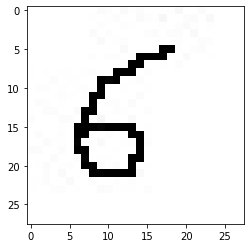

1/1 [==============================] - 0s 17ms/step
The result is probably: 2


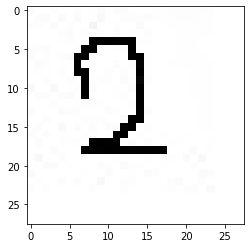

1/1 [==============================] - 0s 17ms/step
The result is probably: 3


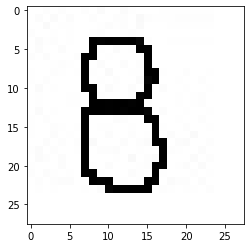

1/1 [==============================] - 0s 18ms/step
The result is probably: 7


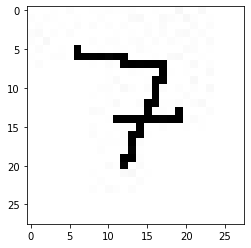

1/1 [==============================] - 0s 18ms/step
The result is probably: 5


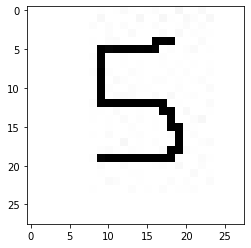

1/1 [==============================] - 0s 16ms/step
The result is probably: 1


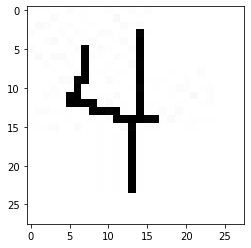

In [49]:
for x in range(1,7):
    img = cv.imread(f"E:/Univercity/ExtraProject/Numbers/{x}.jpg")[:,:,0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print(f'The result is probably: {np.argmax(prediction)}')
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()